## 一、数据可视化和摘要

对于标称属性，给出每个可能取值的频数，并绘制条形统计图

对于数值属性，给出它们的5数概括和缺失值个数，并绘制盒图、条形统计图

In [7]:
import csv
import datetime
from matplotlib import pyplot as plt
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 一、数据可视化和摘要


In [4]:
# 读取数据

# 数据集根路径
data_path = "C:/Users/王欣哲/Desktop/数据挖掘/数据集/Oakland Crime Statistics 2011 to 2016/"
data_json = data_path + "records-for-2016.csv"

# 读取json数据
keys = None
data = []
with open(data_json,'r') as f:
	reader= csv.reader(f)
	for row in reader:
		if reader.line_num == 1:
			keys = row
			continue
		data.append(row)
del data[-1]

# 数据集基本信息
print("数据条数:",len(data))
print("字段名:",keys)
print("条目样例:",data[0])


数据条数: 110827
字段名: ['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number', 'Closed Time']
条目样例: ['OP', '2016-01-01T00:00:57.000', ' ST&MARKET ST    ', 'P1', '05X', '2', '415GS', '415 GUNSHOTS', 'LOP160101000003', '2016-01-01T00:32:30.000']


In [5]:
# 检查属性缺失值
for i,key in enumerate(keys):
	has_none = False
	for j,row in enumerate(data):
		if (row[i] == None) or (row[i] == ""):
			has_none = True
			break
	if has_none:
		print(f"Have None:True    col:{key}")
	else:
		print(f"Have None:False   col:{key}")

Have None:False   col:Agency
Have None:False   col:Create Time
Have None:False   col:Location
Have None:False   col:Area Id
Have None:True    col:Beat
Have None:False   col:Priority
Have None:False   col:Incident Type Id
Have None:False   col:Incident Type Description
Have None:False   col:Event Number
Have None:False   col:Closed Time


从上面的分析知道，数据集中仅Beat属性存在空值

Agency

In [15]:
agency_val = []
for row in data:
	if not (row[0] in agency_val):
		agency_val.append(row[0])
print("Agency value:",agency_val)

Agency value: ['OP']


Create Time

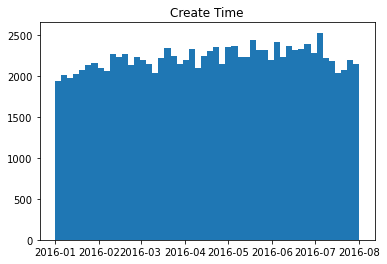

In [16]:
create_time = [datetime.datetime.strptime(x[1], '%Y-%m-%dT%H:%M:%S.000') for x in data]

plt.title("Create Time")
plt.hist(create_time, 50)
plt.show()

Location

从下图可以看到，各个地区的数量分布较为均匀，呈现长尾分布的特点。

Locations: 24046


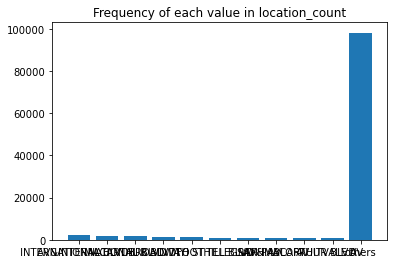

In [33]:
location_count = {}
for row in data:
	if row[2] in location_count.keys():
		location_count[row[2]] +=1
	else:
		location_count[row[2]] =1

location_count_sorted = sorted(location_count.items(),key=lambda x: (x[1],x[0]),reverse=True)

print("Locations:",len(location_count_sorted))
# 绘制条形图
x = [a[0] for a in location_count_sorted[0:10]]
y = [a[1] for a in location_count_sorted[0:10]]
_sum = 0
for a in location_count_sorted[10:]:
	_sum += a[1]
x.append("others")
y.append(_sum)
plt.title("Frequency of each value in location_count")
plt.bar(x,y)
plt.show()

Aera Id

Area id: 8


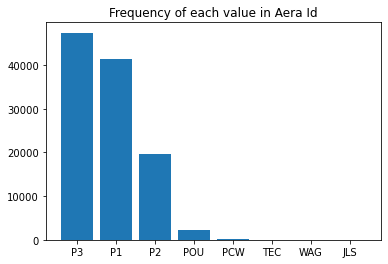

In [34]:
aera_id_count = {}
for row in data:
	if row[3] in aera_id_count.keys():
		aera_id_count[row[3]] +=1
	else:
		aera_id_count[row[3]] =1

aera_id_count_sorted = sorted(aera_id_count.items(),key=lambda x: (x[1],x[0]),reverse=True)

print("Area id:",len(aera_id_count_sorted))
# 绘制条形图
x = [a[0] for a in aera_id_count_sorted]
y = [a[1] for a in aera_id_count_sorted]
plt.title("Frequency of each value in Aera Id")
plt.bar(x,y)
plt.show()

Beat

Area id: 59
None value num: 580


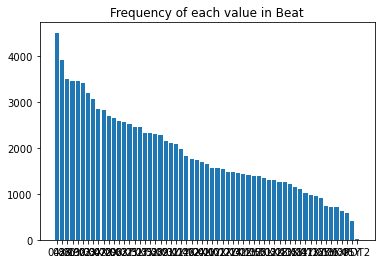

In [54]:
beat_count = {}
for row in data:
	if row[4] in beat_count.keys():
		beat_count[row[4]] += 1
	else:
		beat_count[row[4]] = 1

beat_count_sorted = sorted(
	beat_count.items(), key=lambda x: (x[1], x[0]), reverse=True)

print("Area id:", len(beat_count_sorted))
print("None value num:",beat_count[""])
# 绘制条形图
x = [a[0] for a in beat_count_sorted]
y = [a[1] for a in beat_count_sorted]
plt.title("Frequency of each value in Beat")
plt.bar(x, y)
plt.show()


Priority

Area id: 2


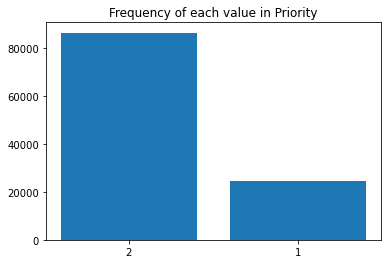

In [41]:
priority_count = {}
for row in data:
	if row[5] in priority_count.keys():
		priority_count[row[5]] += 1
	else:
		priority_count[row[5]] = 1

priority_count_sorted = sorted(
	priority_count.items(), key=lambda x: (x[1], x[0]), reverse=True)

print("Area id:", len(priority_count_sorted))
# 绘制条形图
x = [a[0] for a in priority_count_sorted]
y = [a[1] for a in priority_count_sorted]
plt.title("Frequency of each value in Priority")
plt.bar(x, y)
plt.show()


Incident Type Id

Area id: 242


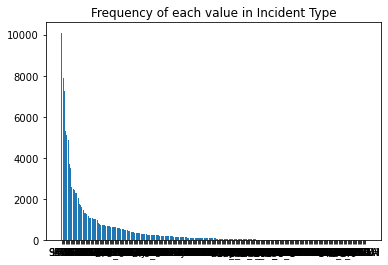

In [42]:
incident_type_count = {}
for row in data:
	if row[6] in incident_type_count.keys():
		incident_type_count[row[6]] += 1
	else:
		incident_type_count[row[6]] = 1

incident_type_count_sorted = sorted(
	incident_type_count.items(), key=lambda x: (x[1], x[0]), reverse=True)

print("Area id:", len(incident_type_count_sorted))
# 绘制条形图
x = [a[0] for a in incident_type_count_sorted]
y = [a[1] for a in incident_type_count_sorted]
plt.title("Frequency of each value in Incident Type")
plt.bar(x, y)
plt.show()


Incidient Type Description

Area id: 245


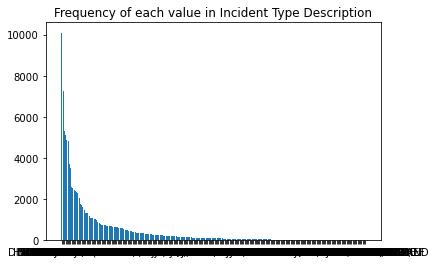

In [49]:
incident_type_description_count = {}
for row in data:
	if row[7] in incident_type_description_count.keys():
		incident_type_description_count[row[7]] += 1
	else:
		incident_type_description_count[row[7]] = 1

incident_type_description_count_sorted = sorted(
	incident_type_description_count.items(), key=lambda x: (x[1], x[0]), reverse=True)

print("Area id:", len(incident_type_description_count_sorted))
# 绘制条形图
x = [a[0] for a in incident_type_description_count_sorted]
y = [a[1] for a in incident_type_description_count_sorted]
plt.title("Frequency of each value in Incident Type Description")
plt.bar(x, y)
plt.show()


Event Number

此字段是犯罪记录的编号，每条记录的编号唯一

Closed Time

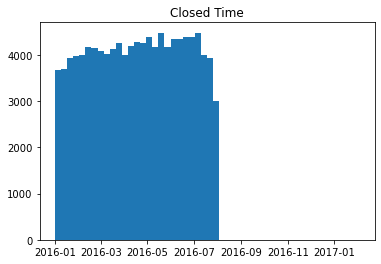

In [45]:
closed_time = [datetime.datetime.strptime(x[9], '%Y-%m-%dT%H:%M:%S.000') for x in data]

plt.title("Closed Time")
plt.hist(closed_time, 50)
plt.show()

## 二、数据缺失的处理

从下面的代码我们可以检查到，仅有Beat属性存在缺失值的情况

In [50]:
# 检查属性缺失值
for i,key in enumerate(keys):
	has_none = False
	for j,row in enumerate(data):
		if (row[i] == None) or (row[i] == ""):
			has_none = True
			break
	if has_none:
		print(f"Have None:True    col:{key}")
	else:
		print(f"Have None:False   col:{key}")

Have None:False   col:Agency
Have None:False   col:Create Time
Have None:False   col:Location
Have None:False   col:Area Id
Have None:True    col:Beat
Have None:False   col:Priority
Have None:False   col:Incident Type Id
Have None:False   col:Incident Type Description
Have None:False   col:Event Number
Have None:False   col:Closed Time


### 1、将缺失部分剔除

In [53]:
# 对每一个数据，若存在空属性，则将其剔除
print(f'Before eliminate data len:{len(data)}')
data_elim = [x.copy() for x in data]	# deep copy
data_elim = [x for x in data_elim if not ("" in x)]	
print(f'After eliminate data len:{len(data_elim)}')


Before eliminate data len:110827
After eliminate data len:110247


### 2、最高频率值填补缺失值

In [64]:
high_freq_val = beat_count_sorted[0]
print("High Freq Value:",high_freq_val)

data_fill_freq = [x.copy() for x in data]	# deep copy
for row in data_fill_freq:
	if row[4] == "":
		row[4] = high_freq_val[0]

# 检查属性缺失值
has_none = False
for j,row in enumerate(data_fill_freq):
	if (row[4] == None) or (row[4] == ""):
		has_none = True
		print(row)
		break
if has_none:
	print(f"Beat have None:True   ")
else:
	print(f"Beat have None:False")

High Freq Value: ('04X', 4515)
Beat have None:False


### 3、通过属性的相关关系来填充

Beat字段的意义是警察巡逻的区域和时间，巡逻警察通常步行或骑自行车巡逻，这样可以在警察和社区成员之间提供更多互动。

由于Beat字段和其它属性间的相关性不明确，因此似乎并不适合使用相关关系填充的方法。进一步可以使用协方差的方式来评估属性间相关关系，但是这样做似乎没有必要，反而可能会为数据带来噪声

### 4、通过数据对象之间的相似性来填补缺失值

In [67]:
def cal_distance(row1,row2):
	dist = 0
	for col in range(0,10):
		if (row1[col] != "") and (row2[col] != ""):
			if row1[col] != row2[col]:
				dist += 1
	return dist


def find_min_dist_row(data, row):
	min_dist = 999999999
	res = None
	for _row in data:
		if _row != row:
			dist = cal_distance(_row, row)
			if dist < min_dist:
				min_dist = dist
				res = _row
	return res

data_fill_obj_similarity = [x.copy() for x in data]	# deep copy
for row in data_fill_obj_similarity:
	if row[4] == "":
		row[4] = find_min_dist_row(data_fill_obj_similarity, row)[4]

	


### 5、新旧数据集可视化对比

由于我们的数据填充仅涉及Beat属性，因此仅对此属性在填充前后的数值进行对比分析。

从分析结果我们可以看到，三种数据缺失的处理方法在结果上差异不大。对比剔除缺失值和高频值填充两个方法，高频值填充方法在高频值取值的数量上有小幅提升，但从整体来看仍不明显。

这主要是因为缺失数据量较少，仅有580/110827。因此在这种情况下，采用剔除缺失值的方法可以获得更快的处理效率，是一种比较理想的选择。

Eliminate:
Area id: 58


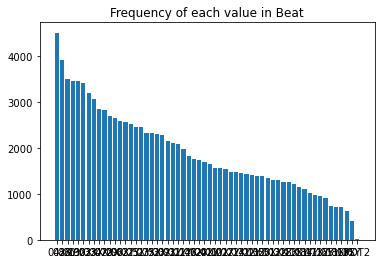

-------------------------
Fill Freq:
Area id: 58


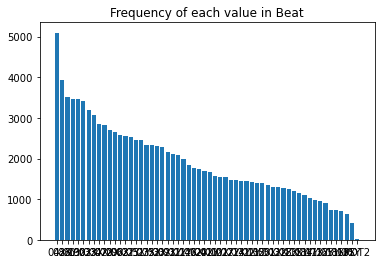

-------------------------
Object Relation:
Area id: 59


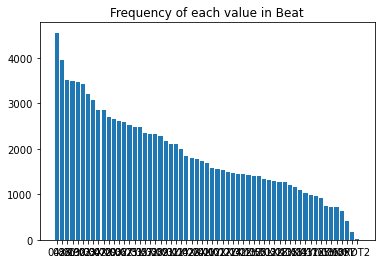

In [71]:
def compare_beat(data):
	beat_count = {}
	for row in data:
		if row[4] in beat_count.keys():
			beat_count[row[4]] += 1
		else:
			beat_count[row[4]] = 1

	beat_count_sorted = sorted(
		beat_count.items(), key=lambda x: (x[1], x[0]), reverse=True)

	print("Area id:", len(beat_count_sorted))

	# 绘制条形图
	x = [a[0] for a in beat_count_sorted]
	y = [a[1] for a in beat_count_sorted]
	plt.title("Frequency of each value in Beat")
	plt.bar(x, y)
	plt.show()

print("Eliminate:")
compare_beat(data_elim)
print("-------------------------")
print("Fill Freq:")
compare_beat(data_fill_freq)
print("-------------------------")
print("Object Relation:")
compare_beat(data_fill_obj_similarity)

